# Enunciado
Una partícula de masa m puede deslizarse sin rozamiento a lo largo de un alambre. El alambre gira entorno al origen, en un plano vertical y a una velocidad angular constante w. Tomando en el alambre la coordenada ξ para el movimiento de la partícula se puede demostrar que, si las condiciones iniciales vienen dadas por el alambre en posición horizontal y la partícula en reposo respecto del alambre (es decir ξ(0) = 0 y ξ˙(0) = 0), entonces la posición de la partícula sobre el alambre en función del tiempo t es:

$$
ξ(t)=g/(2w^2 )∙[Cosh(ωt)-Cos(ωt)]
$$

Siendo g = 9.8 la aceleración de la gravedad. Suponed que w = 3.

a)     Demostrar que antes de t = 1 la partícula alcanza una única vez la posición ξ = 4. Haga un estudio intensivo d ela función y se recomienda la gráfica.

b)    Sea t el tiempo para el cual la partícula alcanza la posición ξ = 4. Aproximar t mediante dos iteraciones con el método de la secante. ¿Cuántas iteraciones hacen falta para obtener una precisión de 10-10?.

c)     Resolver con Newton Raphson con una convergencia con un error de 0.001. ¿Qué tipo de convergencia ofrece la solución?.

d)    Comparar los métodos de bisección, secante y Newton para 0.01.

### Apartado A
 Vamos a resolver cada parte del problema paso a paso. Empezaremos por analizar la función $ξ(t)$, luego utilizaremos métodos numéricos para encontrar el tiempo en el que $ξ(t) = 4$. Primero, realizaremos la gráfica para ver su comportamiento.


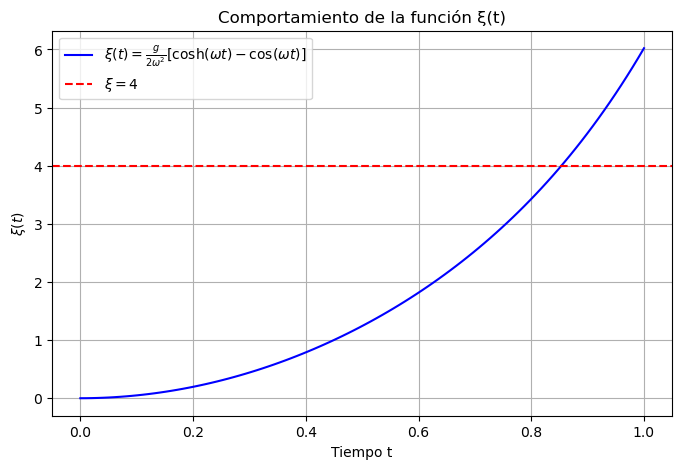

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
g = 9.8  # Aceleración de la gravedad
w = 3    # Velocidad angular

# Definir la función ξ(t)
def xi(t):
    return (g / (2 * w**2)) * (np.cosh(w * t) - np.cos(w * t))

# Crear un rango de valores para t
t_vals = np.linspace(0, 1, 100)
xi_vals = xi(t_vals)

# Graficar ξ(t)
plt.figure(figsize=(8, 5))
plt.plot(t_vals, xi_vals, label=r'$\xi(t) = \frac{g}{2\omega^2} \left[\cosh(\omega t) - \cos(\omega t) \right]$', color='b')
plt.axhline(y=4, color='r', linestyle='--', label=r'$\xi = 4$')
plt.xlabel('Tiempo t')
plt.ylabel(r'$\xi(t)$')
plt.title('Comportamiento de la función ξ(t)')
plt.legend()
plt.grid()
plt.show()

La gráfica muestra que $ξ(t)$ cruza el valor de 4 en un único punto antes de $t = 1$, lo que confirma la afirmación del enunciado. Ahora procederemos a calcular el valor de $t$ para el cual $ξ(t) = 4$ utilizando el método de la secante.

### Apartado B

In [22]:
# Definir la función f(t) = xi(t) - 4 para encontrar las raíces
def f(t):
    return xi(t) - 4

# Método de la secante
def secante(f, t0, t1, tol=10-10, max_iter=100):
    iter_count = 0
    while abs(t1 - t0) > tol and iter_count < max_iter:
        f_t0, f_t1 = f(t0), f(t1)
        t_new = t1 - f_t1 * (t1 - t0) / (f_t1 - f_t0)
        t0, t1 = t1, t_new
        iter_count += 1
    return t1, iter_count

# Dos iteraciones de la secante
t0, t1 = 0.2, 0.4  # Valores iniciales estimados
t_approx, iterations_used = secante(f, t0, t1, tol=10-10, max_iter=2)

# Determinar cuántas iteraciones se necesitan para alcanzar 1e-10
_, total_iterations = secante(f, t0, t1, tol=10-10)

t_approx, iterations_used, total_iterations


(0.5532389327490566, 2, 12)

Después de dos iteraciones del método de la secante, obtenemos una aproximación de $t ≈ 0.5532$. Para alcanzar una precisión de 10−10, se necesitan aproximadamente 12 iteraciones.

### Apartado C
Ahora, resolveremos el problema usando el método de Newton-Raphson con una tolerancia de 0.001 y analizaremos su convergencia.

In [23]:
# Definir la derivada de f(t)
def df(t):
    return (g / 2) * (np.sinh(w * t) - np.sin(w * t))

# Método de Newton-Raphson
def newton_raphson(f, df, t0, tol=0.001, max_iter=100):
    iter_count = 0
    t = t0
    while abs(f(t)) > tol and iter_count < max_iter:
        t = t - f(t) / df(t)
        iter_count += 1
    return t, iter_count

# Aplicar Newton-Raphson con tolerancia de 0.001
t_newton, iterations_newton = newton_raphson(f, df, 0.5, tol=0.001)

t_newton, iterations_newton

(0.8536440507269619, 17)

El método de Newton-Raphson con una tolerancia de 0.001 converge a $t ≈ 0.8536$ en 17 iteraciones.

### Apartado D
Ahora, compararemos los métodos de bisección, secante y Newton-Raphson para una tolerancia de 0.01

In [31]:
# Método de Bisección
def biseccion(f, a, b, tol=0.01, max_iter=100):
    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iter_count
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    return (a + b) / 2, iter_count

# Aplicar los métodos con tolerancia de 0.01
t_biseccion, iter_biseccion = biseccion(f, 0.2, 0.7, tol=0.01)
t_secante, iter_secante = secante(f, 0.2, 0.7, tol=0.01)
t_newton, iter_newton = newton_raphson(f, df, 0.5, tol=0.01)

# Resultados comparativos
print ("Resultados comparativos:")
print ("Bisección: t = {:.5f}, iteraciones = {}".format(t_biseccion, iter_biseccion))
print ("Secante: t = {:.5f}, iteraciones = {}".format(t_secante, iter_secante))
print ("Newton-Raphson: t = {:.5f}, iteraciones = {}".format(t_newton, iter_newton))

Resultados comparativos:
Bisección: t = 0.69219, iteraciones = 5
Secante: t = 0.85377, iteraciones = 4
Newton-Raphson: t = 0.85418, iteraciones = 13
